In [159]:
# Andrew Johnson, CSE 360 Workshop 4
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Get images from visual sensor

In [160]:
import sim as vrep
import time
import cv2
import numpy as np

vrep.simxFinish(-1)

clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)

img_list = []
orientations = []

if clientID!=-1:
    # Handler for the camera
    res, v1 = vrep.simxGetObjectHandle(clientID, 'Vision_sensor', vrep.simx_opmode_oneshot_wait)
    print ('Getting first image')
    err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_streaming)
    
    # Take p pictures
    p = 12
    i = 0
    while i < p:     
        err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_buffer)
        if err == vrep.simx_return_ok:
            orientations.append(vrep.simxGetObjectOrientation(clientID, v1, 0, vrep.simx_opmode_streaming))
            print ("image %d OK!!!"%i)
            img = np.array(image,dtype=np.uint8)
            img.resize([resolution[1],resolution[0],3])
            # Show the images using Opencv (uncomment if you want to try it)
#             cv2.imshow('image',img)
#             if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
            i+=1
            img_list.append(img)
        elif err == vrep.simx_return_novalue_flag:
            print ("no image yet")
            pass
        else:
          print (err)
        time.sleep(1)
else:
  print ("Failed to connect to remote API Server")
  vrep.simxFinish(clientID)

Getting first image
no image yet
image 0 OK!!!
image 1 OK!!!
image 2 OK!!!
image 3 OK!!!
image 4 OK!!!
image 5 OK!!!
image 6 OK!!!
image 7 OK!!!
image 8 OK!!!
image 9 OK!!!
image 10 OK!!!
image 11 OK!!!


In [161]:
print(orientations)
o2 = []
for o in orientations:
    o2.append(o[1])
print(o2)
o3 = []
for oo in o2:
    o3.append(oo[0]) # get pitch
print(o3)

[(1, [0.0, 0.0, 0.0]), (0, [2.265747547149658, -0.2726220488548279, -3.14081072807312]), (0, [2.2655258178710938, 0.17319951951503754, 3.1409952640533447]), (0, [2.2653794288635254, 0.5866814255714417, 3.1399378776550293]), (0, [2.2682673931121826, 1.0069862604141235, 3.1366689205169678]), (0, [2.2742443084716797, 1.4136326313018799, 3.129936456680298]), (0, [-0.8944225907325745, 1.3216452598571777, 0.014801409095525742]), (0, [-0.8828898072242737, 0.9297964572906494, 0.0029761141631752253]), (0, [-0.8821151852607727, 0.5508016347885132, 0.0015004775486886501]), (0, [-0.8827460408210754, 0.1680651754140854, 0.0005187466740608215]), (0, [-0.8809509873390198, -0.23270167410373688, -0.0005207268404774368]), (0, [-0.8838868737220764, -0.626401424407959, -0.0029133129864931107])]
[[0.0, 0.0, 0.0], [2.265747547149658, -0.2726220488548279, -3.14081072807312], [2.2655258178710938, 0.17319951951503754, 3.1409952640533447], [2.2653794288635254, 0.5866814255714417, 3.1399378776550293], [2.2682673

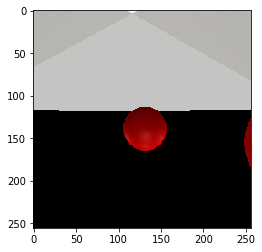

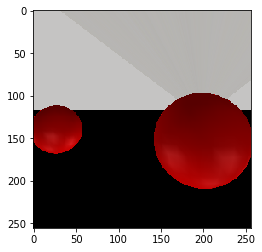

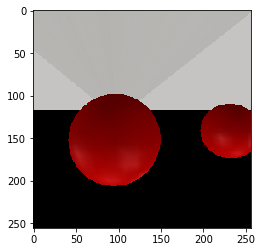

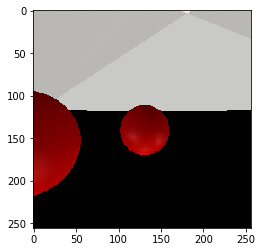

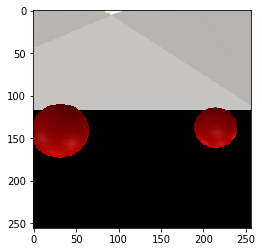

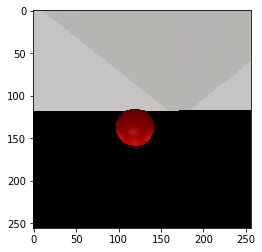

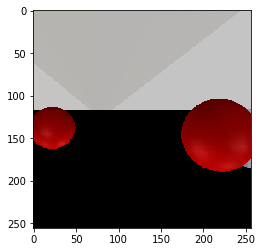

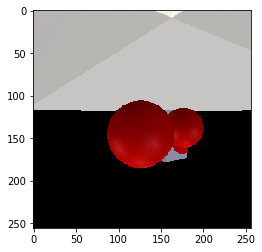

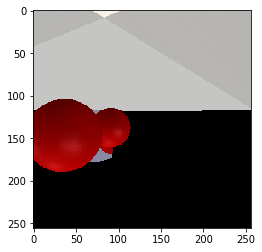

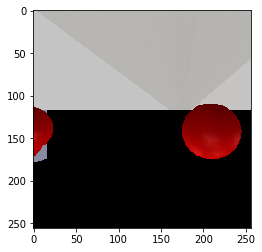

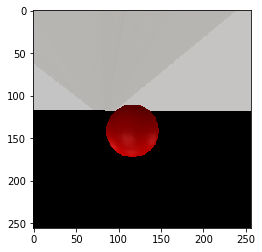

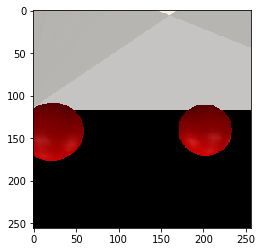

In [162]:
def process(img, gray=None):
    plt.figure()
    if gray == True:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    

#imshow(img)
for i in img_list:
    process(i)
    #print(i)

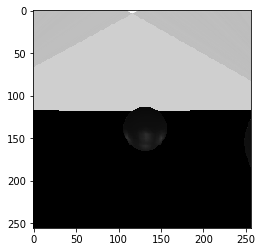

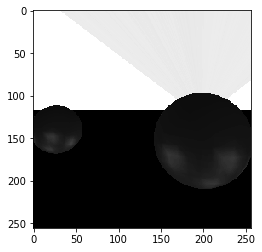

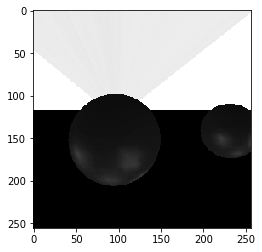

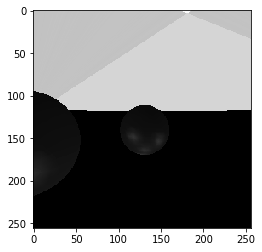

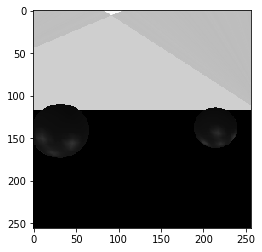

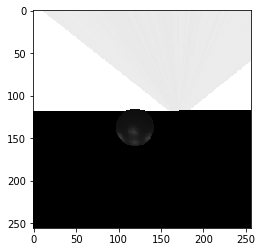

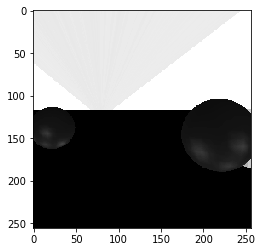

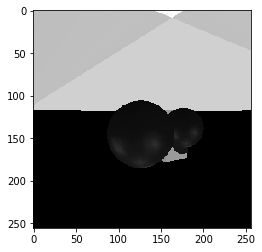

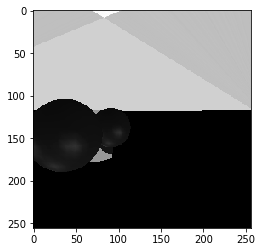

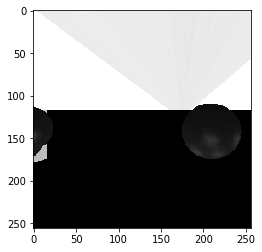

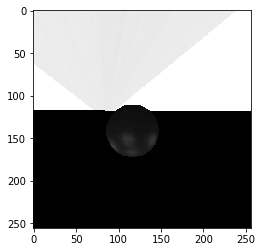

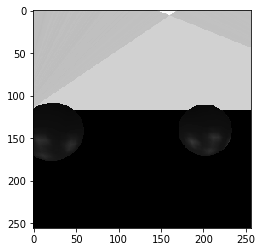

In [163]:
# Convert to gray scale
gray_images = []
for i in img_list:
    gray_images.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

for g in gray_images:
    process(g, True)

[[[131.5 139.5  25.4]]]
[[[197.5 153.5  56.8]
  [ 28.5 139.5  28.6]]]
[[[ 94.5 151.5  54.7]
  [230.5 141.5  32.7]]]
[[[130.5 139.5  28.4]]]
[[[ 33.5 140.5  31.6]
  [212.5 137.5  23.8]]]
[[[119.5 136.5  21.8]]]
[[[217.5 146.5  43.3]
  [ 24.5 137.5  24.1]]]
[[[127.5 146.5  41.1]
  [174.5 139.5  25. ]]]
[[[ 36.5 149.5  45.8]
  [ 91.5 137.5  22.9]]]
[[[208.5 143.5  35.2]]]
[[[115.5 141.5  31.6]]]
[[[ 23.5 141.5  34.9]
  [202.5 139.5  31.2]]]


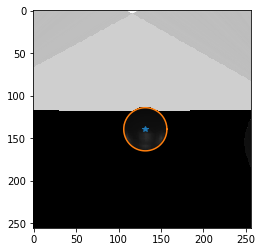

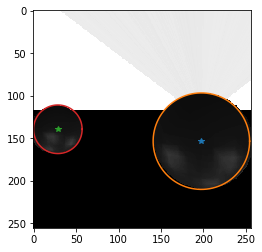

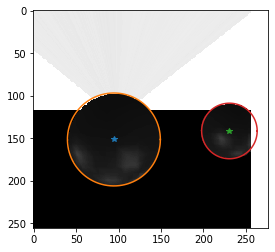

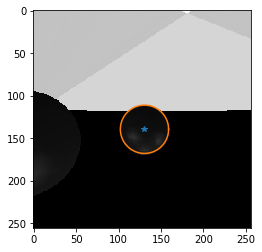

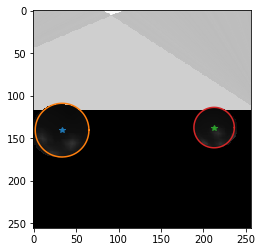

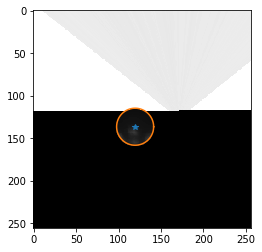

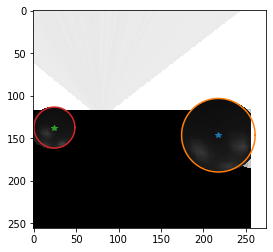

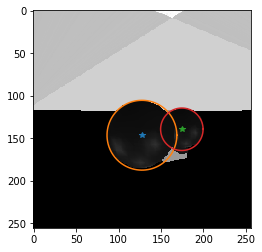

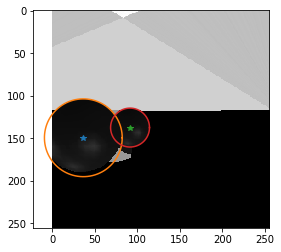

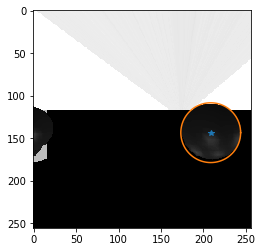

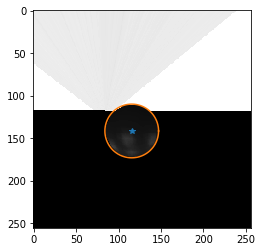

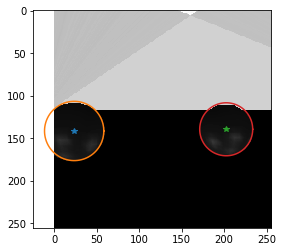

In [164]:
#gray = cv2.medianBlur(gray,5)

for g in gray_images:
    g = cv2.medianBlur(g,5)

centers_list = []
radii_list = []

ctr = 0

circle_orient = []
    
for g in gray_images:
    process(g, True)
    circles = cv2.HoughCircles(g, cv2.HOUGH_GRADIENT, 1, g.shape[0] / 8, param1=30,param2=15,minRadius=10,maxRadius=70)
    print(circles)
    if circles is not None:
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # In pixels
            radius = circle[2]  # In pixels
            circle_orient.append(o3[ctr])
            
            # plot circle
            s = linspace(0,2*pi,100)
            cx = cos(s)*radius + center [0]
            cy = sin(s)*radius + center [1]
            # Plot center
            plot(center[0], center[1], '*')
            centers_list.append(center)
            radii_list.append(radius)
            plot(cx,cy)
    ctr = ctr + 1



In [165]:
u0, v0 = 132, 132

xc_list = []
zc_list = []

rad = 0

k_list = []

for center in centers_list:
    k = radii_list[rad] / (1.5 / 2)  # Pixels per meters (radius in pixels / radius in  meters)
    fov = 60  # degrees
    
    k_list.append(k)
    
    # number of pixels in x-axis
    npx = 264

    # maximum value in the x-axis (in meters)
    xmax = npx / (2.* k)

    # Distance to the center of the sphere (z-axis coordinate)
    zc = xmax / tan(pi/6)
    

    # Location of the sphere in the x-axis coordinate
    xc = (center[0] - u0) / k
    
    
    
    #adjust for orientation
    xc2 = xc * cos(circle_orient[rad]) - zc * sin(circle_orient[rad])
    zc2 = zc * cos(circle_orient[rad]) + xc * sin(circle_orient[rad])
    rad = rad + 1
    
    zc_list.append(zc2)
    xc_list.append(xc2)

    
rad = 0

### Grid representation

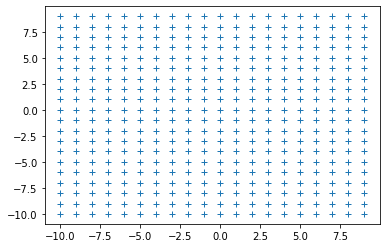

In [166]:
# Tha map is 20x20 sq meters
# Lets define a grid of nxn
n = 20
gmap = zeros(n*n) # the map is a grid of nxn

# x and y coordinates for the grid cells. Lowest and leftest point in the cell.
cell_w = 20/n
grid_x, grid_y = np.mgrid[-10:10:cell_w,-10:10:cell_w]
# Convert the matrix into a vector
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()

plot(grid_x, grid_y, '+')

Draw each cell independently

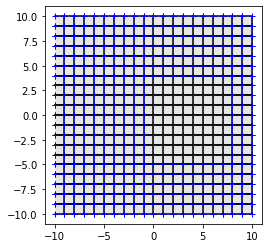

In [167]:
# Computes the four points of the square that composes a cell
def points_cell(x, y, d):    
    X = [x, x+d, x+d, x]
    Y = [y, y, y+d, y+d]
    return X, Y

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
# plot each cell
for x, y in zip(grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='0.9')
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    
fig.canvas.draw()

## Use the measurement

In [168]:
l0 = (0.3/(1-0.3))  # Initial belief
gmap = l0 * ones(n*n) # Initial belief


# For each cell, check if the circle is in it.
for i in range(n*n):
    x, y = grid_x[i], grid_y[i]
    #TODO Run this for each sphere (center and radius)
    for circle in range(len(zc_list)):
        # Corners of the cell
        X, Y = points_cell(x, y, cell_w)
        # check based on the ecuclidean distance

        dist = sqrt((xc_list[circle] - X)**2 + (zc_list[circle] - Y)**2)

        # Check if At least one of the borders is within the sphere
        if((dist < radii_list[circle]/k_list[circle]).any()):
            print(dist)
            po = 0.8  # P(mi/zt) probability of having an obstacle 
            li = log(po / (1-po)) + gmap[i] - l0
            gmap[i] = li  # P(mi/zt) 
            print(li)
        else:
            po = 0.05  # P(mi/zt) probability of having an obstacle given a non-detected obstacle

            # Cells within the fov. Check if the four points are withing the FOV
            thetas = np.arctan2(Y,X) - 2*pi
            if np.logical_and(-pi/6 <thetas, thetas < pi/6).all():
                li = log(po / (1-po)) + gmap[i] - l0
                gmap[i] = li

            pass

# gmap

[1.56654243 1.32556472 0.35124358 0.90570712]
1.3862943611198908
[0.90570712 0.35124358 0.69973013 1.08929133]
1.3862943611198908
[1.08929133 0.69973013 1.68993268 1.8848888 ]
1.3862943611198908
[2.036365   1.60857359 0.64757022 1.40663449]
1.3862943611198908
[1.40663449 0.64757022 0.50118397 1.3455329 ]
1.3862943611198908
[1.3455329  0.50118397 1.44326836 1.90848027]
1.3862943611198908
[1.32556472 1.74933945 1.1943361  0.35124358]
1.3862943611198908
[2.05595825 1.47526354 0.64748958 1.57156118]
1.3862943611198908
[0.35124358 1.1943361  1.33891334 0.69973013]
2.3440172936683528
[1.57156118 0.64748958 0.81368482 1.64701086]
1.3862943611198908
[0.69973013 1.33891334 2.03934772 1.68993268]
2.3440172936683528
[1.60857359 1.74018264 0.92740163 0.64757022]
1.3862943611198908
[0.64757022 0.92740163 0.83181246 0.50118397]
1.3862943611198908
[1.77288269 1.17060224 0.40041131 1.3903714 ]
1.3862943611198908
[0.50118397 0.83181246 1.58863154 1.44326836]
2.3440172936683528
[1.3903714  0.40041131 0.

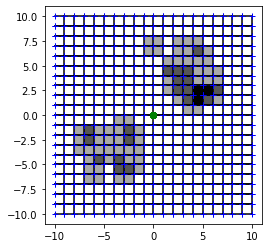

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# normalize gmap
gmap = gmap - min(gmap)
gmap = gmap / max(gmap)

# plot each cell
for c, x, y in zip(gmap, grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='%f'%(1-c))
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    plot(0,0, 'go')
    
fig.canvas.draw()